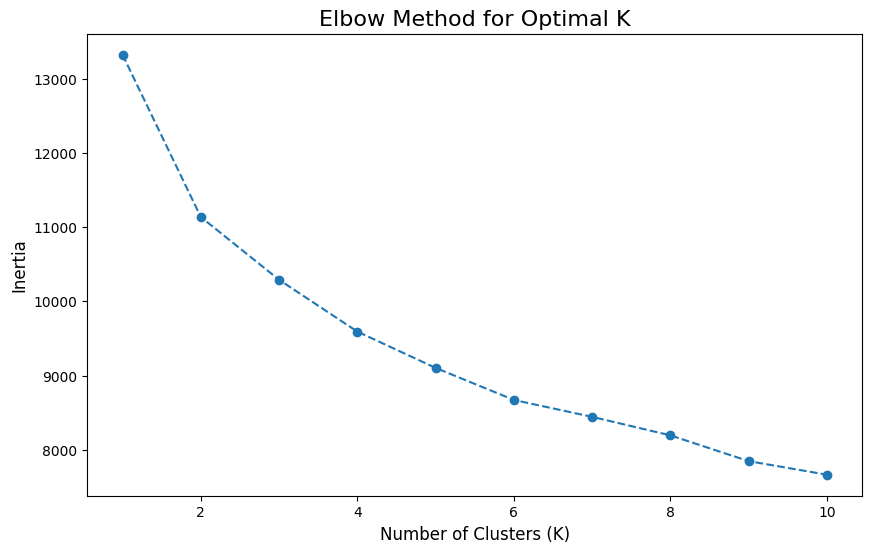

--- K-Means Cluster vs Actual Labels ---
Actual     0    1
Cluster          
0        334   61
1        165  465


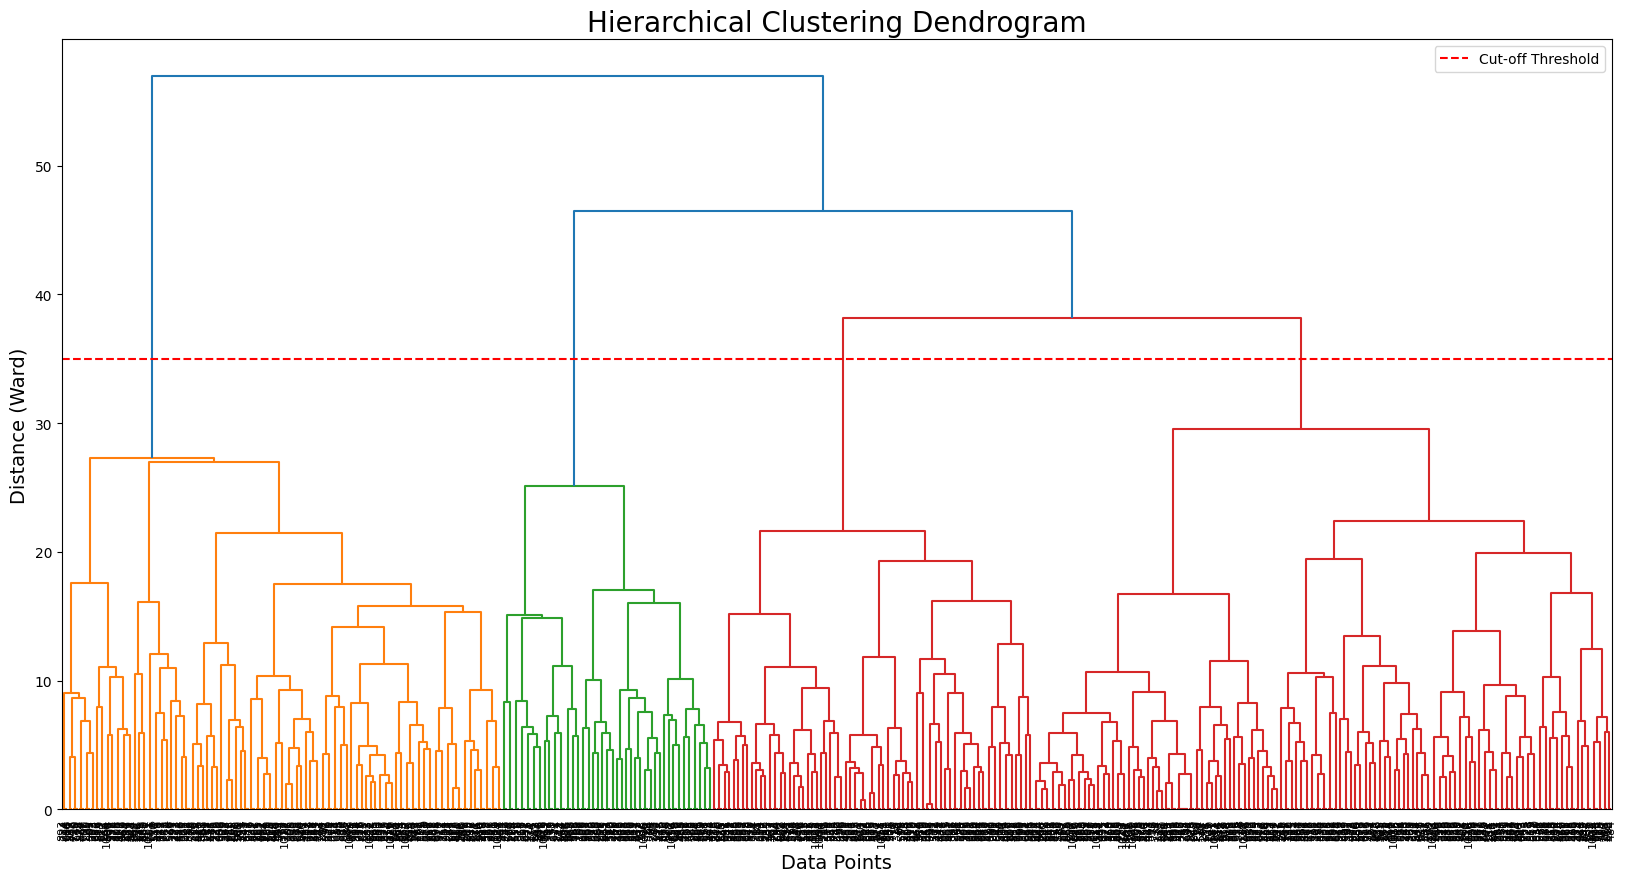

In [1]:
# --- Cell 1: Imports ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# --- Cell 2: Load and Prepare Data ---
df = pd.read_csv('../data/heart_disease_cleaned.csv')
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Cell 3: K-Means Clustering ---
# Use the Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K', size=16)
plt.xlabel('Number of Clusters (K)', size=12)
plt.ylabel('Inertia', size=12)
plt.show()

# Based on the elbow, K=2 or K=3 seems reasonable. We'll use K=2 to compare with the target.
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Compare clusters with actual labels
cluster_comparison = pd.DataFrame({'Cluster': clusters, 'Actual': y})
print("--- K-Means Cluster vs Actual Labels ---")
print(pd.crosstab(cluster_comparison['Cluster'], cluster_comparison['Actual']))


# --- Cell 4: Hierarchical Clustering (Dendrogram) ---
# Generate the linkage matrix
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram', size=20)
plt.xlabel('Data Points', size=14)
plt.ylabel('Distance (Ward)', size=14)
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.axhline(y=35, color='r', linestyle='--', label='Cut-off Threshold')
plt.legend()
plt.show()